In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/Viability/GDSC'

# GDSC1 and GDSC2

In [ ]:
# https://www.cancerrxgene.org/downloads/bulk_download

In [3]:
df0=pd.read_excel(f'{Path}/downloaded_data/Cell_Lines_Details.xlsx', sheet_name='Cell line details')
df0

/home/mgander/miniconda3/envs/phos/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent
998,KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN
999,SC-1,1331030.0,Y,Y,N,N,N,lymphoma,B_cell_lymphoma,DLBC,MSS/MSI-L,R,NaN
1000,U-CH2,1503373.0,Y,Y,N,N,N,bone,bone_other,NaN,MSS/MSI-L,D/F12,Adherent


In [4]:
df1=pd.read_csv(f'{Path}/downloaded_data/screened_compounds_rel_8.5.csv')
compounds=df1['DRUG_NAME']
ids=df1['DRUG_ID']
Compound_dict={str(ids[i]):compounds[i] for i in range(len(ids))}
Compound_dict['nan']='nan'

# This GDSC1 drug seems to be missing and I couldn't figure out which one this might be...
Compound_dict['1205']='nan'

# And the same for these 4 GDSC2 drugs
Compound_dict['1807']='nan'
Compound_dict['1818']='nan'
Compound_dict['2136']='nan'
Compound_dict['4000']='nan'

The Genomics of Drug Sensitivity in Cancer (GDSC) Project has assayed the sensitivity of 987 cancer cell lines to 320 compounds in their phase 1 (GDSC1) assay and of an additional 809 cancer cell lines to 175 compounds (some of which were included in the GDSC1 assay) in their phase 2 (GDSC2) assay

In [5]:
M0=pd.read_csv(f'{Path}/downloaded_data/GDSC1_public_raw_data_27Oct23.csv')

/tmp/ipykernel_30757/3269075107.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  M0=pd.read_csv(f'{Path}/downloaded_data/GDSC1_public_raw_data_27Oct23.csv')


In [6]:
M0['DRUG_ID']=[str(int(a)) if str(a)!='nan' else 'nan' for a in M0['DRUG_ID']]

In [7]:
M0

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,1,B,nan,NaN,26022
1,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,2,B,nan,NaN,20491
2,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,3,UN-USED,nan,NaN,181946
3,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,4,UN-USED,nan,NaN,213387
4,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,5,UN-USED,nan,NaN,166452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976178,MGH_GDSC1,026_144_00287710,96581,2014-08-24T23:00:00Z,NaN,3344,737,910706,BL-41,SIDM00985,NaN,26_a_7,s,NaN,380,UN-USED,nan,NaN,688924
5976179,MGH_GDSC1,026_144_00287710,96581,2014-08-24T23:00:00Z,NaN,3344,737,910706,BL-41,SIDM00985,NaN,26_a_7,s,NaN,381,UN-USED,nan,NaN,674334
5976180,MGH_GDSC1,026_144_00287710,96581,2014-08-24T23:00:00Z,NaN,3344,737,910706,BL-41,SIDM00985,NaN,26_a_7,s,NaN,382,UN-USED,nan,NaN,664066
5976181,MGH_GDSC1,026_144_00287710,96581,2014-08-24T23:00:00Z,NaN,3344,737,910706,BL-41,SIDM00985,NaN,26_a_7,s,NaN,383,B,nan,NaN,34663


In [8]:
set(M0['CONC'])

{0.5,
 1.0,
 2.0,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 10.0,
 2.5,
 4.0,
 5.0,
 15.625,
 7.8125,
 8.0,
 15.0,
 16.0,
 20.0,
 3.75,
 3.125,
 3.0,
 nan,
 25.0,
 nan,
 nan,
 nan,
 nan,
 30.0,
 1.25,
 0.625,
 0.3125,
 0.15625,
 0.078125,
 0.0390625,
 31.25,
 0.01953125,
 0.0009765625,
 0.009765625,
 7.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 50.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 12.5,
 62.5,
 nan,
 64.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 100.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 125.0,
 nan,
 nan,
 128.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.875,
 0.9375,
 0.46875,
 0.234375,
 0.1171875,
 0.00244140625,
 32.0,
 0.78125,
 0.1953125,
 0.75,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

It is worth pointing out that OSI-027 was assayed twice (GDSC1 by the Massachusetts General Hospital and GDSC2 by the Sanger) with two different drug IDs (299 for GDSC1 and 1594 for GDSC2).

###### This is true,  both 299 and 1594 are linked to OSI-027

In [9]:
M0['Compound']=[Compound_dict[a] for a in M0['DRUG_ID']]

In [10]:
len(M0)/10**6

5.976183

In [11]:
# And the same for GDSC2

In [12]:
M1=pd.read_csv(f'{Path}/downloaded_data/GDSC2_public_raw_data_27Oct23.csv')

In [13]:
M1['DRUG_ID']=[str(int(a)) if str(a)!='nan' else 'nan' for a in M1['DRUG_ID']]

In [14]:
M1['Compound']=[Compound_dict[a] for a in M1['DRUG_ID']]

In [15]:
len(M1)/10**6

15.069449

# Concatante both frames and save them

In [16]:
M0['Source']='GDSC1'
M1['Source']='GDSC2'

In [17]:
M=pd.concat([M0, M1], ignore_index=True)

In [16]:
# We still need to transform intensities into viabilities

# We got SCAN-ID, which is essentially the 360 well plate, and for each plate we have several 
# NC-0 Negative control (no treatment), and NC-1 Negative control (treatment with DMSO)
# We take the mean intesity of all negative controlls to define the untreated intensitiy and divide all treated
# ones by that to get the viability


# If there are less than 3 NC-1 negative samples combine NC-1 and NC-0, else take only NC-1


projects=sorted(set(M['RESEARCH_PROJECT']))
M['RESEARCH_PROJECT']=M['RESEARCH_PROJECT'].astype('category')
frames=[]
for i in range(len(projects)):
    project=projects[i]
    print(project)

    Mp=M[M['RESEARCH_PROJECT']==project].copy()
    Mp['SCAN_ID']=Mp['SCAN_ID'].astype('category')
    scan_ids=sorted(set(Mp['SCAN_ID']))

    for j in range(len(scan_ids)):
        scan_id=scan_ids[j]
        Mps=Mp[Mp['SCAN_ID']==scan_id].copy()

        ncs=Mps[Mps['TAG']=='NC-1'].copy()

        if len(ncs)<3:
            ncs=Mps[Mps['TAG'].isin(['NC-0', 'NC-1'])].copy()

        mean_nc_intensity=np.mean(ncs['INTENSITY'])
        std=np.std(ncs['INTENSITY'])
        Mps['Viability']=Mps['INTENSITY']/mean_nc_intensity


        frames.append(Mps)
M=pd.concat(frames, ignore_index=True)

GDSC_001-A
GDSC_001-B
GDSC_002-A
GDSC_002-B
GDSC_003-A
GDSC_003-B
GDSC_004-A
GDSC_004-B
GDSC_005-A
GDSC_005-B
GDSC_006-A
GDSC_006-B
GDSC_007-A
GDSC_007-B
GDSC_008-A
GDSC_008-B
GDSC_009-A
GDSC_009-B
GDSC_011_Ovarian
GDSC_Breast
GDSC_Breast-2
GDSC_Colo-2
GDSC_Panc
GDSC_Panc-Validation
GDSC_Plus
GDSC_SA
MGH_GDSC1
Sanger_GDSC1


In [17]:
# Let's remove all the controls
M=M[~M['TAG'].isin(['NC-0', 'NC-1', 'UN-USED', 'B', 'DMSO', 'k1', 'k2', 'ss', 'k', ])].copy()

In [18]:
M['CCL']=M['CELL_LINE_NAME']
M['Drug']=M['Compound']
# CONC:Micromolar concentration of the drug id used for treatment. As with DRUG_ID this field can be NA.
M['Dose']=M['CONC']
M['Duration']=M['DURATION']*24

In [19]:
# Only keep relevant columns
M['Drug']=M['Compound']
M=M[['CCL', 'Drug', 'Dose', 'Duration', 'Viability', 'Source']].copy()

In [20]:
M.to_pickle(f'{Path}/M.pkl')

In [64]:
M=pd.read_pickle(f'{Path}/M.pkl')

In [65]:
M=M[M['Source']=='GDSC2'].copy()
M['CCL']=list(M['CCL'])
M['Drug']=list(M['Drug'])

In [66]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])
C

Drug,123138,123829,150412,5-Fluorouracil,5-azacytidine,50869,615590,630600,667880,720427,...,Wee1 Inhibitor,Wnt-C59,XAV939,YK-4-279,ZM447439,Zoledronate,alpha-lipoic acid,ascorbate (vitamin C),glutathione,nan
CCL,,,,,,,,,,,,,,,,,,,,,
22RV1,7,7,7,35,7,7,7,7,7,7,...,7,7,7,7,14,7,7,14,14,28
23132-87,7,7,7,35,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,28
42-MG-BA,7,7,7,35,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,28
451Lu,0,0,0,14,0,0,0,0,0,0,...,7,14,7,7,14,0,0,0,0,0
5637,7,7,7,35,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,28,28,0,0,0,0,0,...,7,0,0,7,7,0,7,7,7,56
ZR-75-30,7,7,7,63,7,7,7,7,7,7,...,35,7,7,7,35,7,7,7,7,28
huH-1,7,7,7,35,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,28


In [67]:
(C>0).sum().sum()

236909

In [69]:
4264001/236909

17.998476208164316

<Axes: ylabel='Count'>

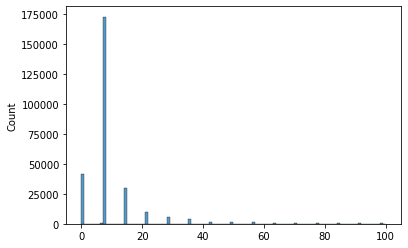

In [70]:
sns.histplot(C.values.flatten(), bins=np.linspace(0,100,101))

In [71]:
M

,CCL,Drug,Dose,Duration,Viability,Source
100,A204,Staurosporine,2.000000,96.0,0.051675,GDSC2
101,A204,MG-132,4.000000,96.0,0.055980,GDSC2
105,A204,Sorafenib,10.000000,96.0,0.286412,GDSC2
106,A204,Sorafenib,3.162555,96.0,0.590064,GDSC2
107,A204,Sorafenib,1.000176,96.0,0.704232,GDSC2
...,...,...,...,...,...,...
15069344,RPMI-6666,LY2109761,10.000000,96.0,1.007184,GDSC2
15069345,RPMI-6666,OF-1,10.000000,96.0,0.909823,GDSC2
15069346,RPMI-6666,MN-64,10.000000,96.0,1.021090,GDSC2
15069347,RPMI-6666,GSK2830371A,10.000000,96.0,0.905852,GDSC2


In [ ]:
123829

In [74]:
M[(M['CCL']=='A204')&(M['Drug']=='123829')]

,CCL,Drug,Dose,Duration,Viability,Source
13950854,A204,123829,0.003002,96.0,1.164715,GDSC2
13950897,A204,123829,0.009491,96.0,1.075097,GDSC2
13950940,A204,123829,0.030011,96.0,1.078990,GDSC2
13950983,A204,123829,0.094893,96.0,1.219256,GDSC2
13951026,A204,123829,0.300053,96.0,1.090669,GDSC2
13951069,A204,123829,0.948767,96.0,1.125746,GDSC2
13951112,A204,123829,3.000000,96.0,1.164715,GDSC2


In [21]:
M

,CCL,Drug,Dose,Duration,Viability,Source
15069475,8-MG-BA,Rapamycin,0.100000,72.0,0.718018,GDSC1
15069476,8-MG-BA,Rapamycin,0.050000,72.0,0.694362,GDSC1
15069477,8-MG-BA,Rapamycin,0.025000,72.0,0.752758,GDSC1
15069478,8-MG-BA,Rapamycin,0.012500,72.0,0.833563,GDSC1
15069479,8-MG-BA,Rapamycin,0.006250,72.0,0.596443,GDSC1
...,...,...,...,...,...,...
21045601,COR-L279,Cetuximab,65.800000,72.0,1.186447,GDSC1
21045602,COR-L279,Cetuximab,16.450000,72.0,1.196229,GDSC1
21045603,COR-L279,Cetuximab,4.112500,72.0,1.188168,GDSC1
21045604,COR-L279,Cetuximab,1.028125,72.0,1.070563,GDSC1


In [26]:
M

,CCL,Drug,Dose,Duration,Viability,Source
15069475,8-MG-BA,Rapamycin,0.100000,72.0,0.718018,GDSC1
15069476,8-MG-BA,Rapamycin,0.050000,72.0,0.694362,GDSC1
15069477,8-MG-BA,Rapamycin,0.025000,72.0,0.752758,GDSC1
15069478,8-MG-BA,Rapamycin,0.012500,72.0,0.833563,GDSC1
15069479,8-MG-BA,Rapamycin,0.006250,72.0,0.596443,GDSC1
...,...,...,...,...,...,...
21045601,COR-L279,Cetuximab,65.800000,72.0,1.186447,GDSC1
21045602,COR-L279,Cetuximab,16.450000,72.0,1.196229,GDSC1
21045603,COR-L279,Cetuximab,4.112500,72.0,1.188168,GDSC1
21045604,COR-L279,Cetuximab,1.028125,72.0,1.070563,GDSC1


In [23]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])

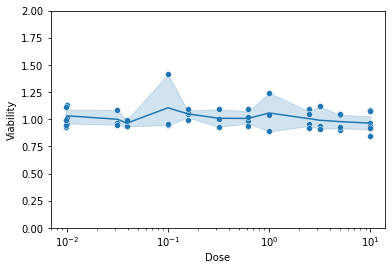

In [85]:
for i in range(100):
    cs=C.sample().T.sample(1)
    if cs.values>3:
        dr=list(cs.index)[0]
        ccl=list(cs.columns)[0]
        Ms=M[(M['CCL']==ccl)&(M['Drug']==dr)].copy()
        sns.lineplot(data=Ms, x='Dose', y='Viability')
        sns.scatterplot(data=Ms, x='Dose', y='Viability')
        break
plt.ylim(0,2)
plt.xscale('log')

In [ ]:
# Some look a bit questionable, but most are fine